Final Models

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor,Ridge,Lasso
import phik
from category_encoders import TargetEncoder
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
import joblib
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from mlxtend.regressor import StackingCVRegressor
warnings.filterwarnings('ignore')

Reading train and test csv files

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Target variable

In [3]:
y = train['y']

Corelation matrix of the train data using phik

In [13]:
corelation_mat = train.phik_matrix()

interval columns not set, guessing: ['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 

Label Encoding  categorical features

In [9]:
##Categorical columns
cat_columns=[]
for i in train.columns:
    if train[i].dtype =='O' or train[i].dtype =='float64':
        cat_columns.append(i)

Label encoding features

In [10]:
##Categorical train data
##Categorical train data
cat_train = train[cat_columns]
##Categorical test data
cat_columns.remove('y')
cat_test = test[cat_columns]

##Label encoding categorical features
for i in cat_columns:
    en = LabelEncoder()
    en.fit(list(train[i].values)+list(test[i].values))
    joblib.dump(en,'final1/en_'+str(i)+'.pkl')
#     cat_test[i] = en.transform(test[i])

Binary data

In [11]:
##Binary data
binary_columns=[]
for i in train.columns:
    if train[i].dtype =='int64':
        binary_columns.append(i)
binary_train = train[binary_columns]
binary_test = test[binary_columns]

Merging encoded and Binary Features

In [40]:
X1_train = cat_train.drop('y',axis=1)
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

XGB on target values less than 200 and top 260 features

In [272]:
##Index of data with y values less than 175
outlier_index = train[train['y']<175].index

In [275]:
##saving the index as a array
joblib.dump(outlier_index,'final/outlier_index.npz')

['final/outlier_index.npz']

Final data for training with top features and target values less than 175

In [16]:
top_260_features = corelation_mat['y'].sort_values(ascending=False)[0:260]
top_260_features=top_260_features.drop('y')
X2_test = X1_test[top_260_features.index]
X2_train = X1_train.iloc[train[train['y']<175].index]
y2 = y[train[train['y']<175].index]
X2_train = X2_train[top_260_features.index]

In [14]:
##Saving top features as a array
joblib.dump(top_features.index,'final/top_features.npz')

['final/top_features.npz']

Parameters for Gridsearch

In [251]:
params1={}
params1['eta']=[0.06,0.04,0.02]
params1['n_estimators']=[250,500,750,1000]
params1['max_depth']=[2,4,6,8]
# params1['objective'] = ['reg:linear']
params1['reg_lambda']=[0,1,2]
# params1['interaction_constraints']='[[314,315],[229,339]]'

Training

In [252]:
clf = xgb.XGBRegressor(objective='reg:squarederror',)
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1,verbose=5)
grid3.fit(X2_train.values,y2)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  7.0min finished


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

Saving the best model

In [254]:
joblib.dump(grid3,'final/best_model1.pkl')

['final/best_model1.pkl']

Submitting to kaggle 

In [182]:
best2 = grid3.best_estimator_
pred = best2.predict(X2_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('stacked1/x1.csv',index=False)

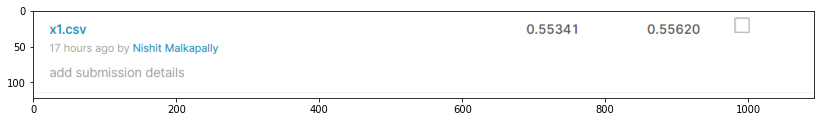

In [4]:
plt.figure(figsize=(14,6))
x = plt.imread('stacked1/x1.PNG')
plt.imshow(x)

Using XGB with grid search on data with target values less than 200 and selecting top 260 features model has r2 score of 0.55341 which is like top 1% in leaderboard . so using this model as the final model

#### Final function 1 -- Prediting time taken

In [4]:
def final1(data):
    """Given data frame or a single data point it returns
        the time taken to complete the testing phase of a 
        car configuration."""
    ##loading the top features
    best_features = joblib.load('final/top_features.npz')
    
    ##Loading the model
    best_model = joblib.load('final/best_model1.pkl')
    
    ##for a single data point
    if len(data.shape) == 1:
        ##Categorical columns
        cat_col = []
        ##Binary columns
        bin_col = []
        ##Dataframe to store processed data
        t = pd.DataFrame()
        
        ## Splitting Categorical and binary features
        for i in data.index:
            if type(data[i]) == str:
                cat_col.append(i)
            if type(data[i]) == np.int64:
                bin_col.append(i)
                
        ##Encoding categorical features with that particular encoder
        for i in cat_col:
            en = joblib.load('final1/en_'+str(i)+'.pkl')
            t[i]=en.transform(np.array(test[i].iloc[0]).reshape(1,-1))
            
        ##Merging binary data to the preprocessed data frame
        t[data[bin_col].index] = data[bin_col].values
        total_data = t
        
        ##Final data with selected features
        final_data = total_data[best_features]
        
        ##Predicing 
        pred = best_model.predict(final_data.values[0].reshape(1,-1))
        
        return pred[0]
    
    
    ##For a set of points or dataframe
    if len(data) > 1:
        ##Categorical columns
        cat_col = []
        ##Binary columns
        bin_col = []
        
        ## Splitting Categorical and binary features
        for i in data.columns:
            if data[i].dtype == 'O':
                cat_col.append(i)
            if data[i].dtype =='int64':
                bin_col.append(i)
                
        ##Encoding categorical features with its encoder
        cat_data=pd.DataFrame()
        for i in cat_col:
            en = joblib.load('final/en_'+str(i)+'.pkl')
            cat_data[i] = en.transform(data[i])
        
        ##Merging encoded features with binary features
        total_data = pd.concat((cat_data,data[bin_col]),axis=1)
        
        ##Final data with selected features
        final_data = total_data[best_features]
        
        ##Predicting
        pred = best_model.predict(final_data.values)
        
        return pred

Predicing the time taken on a random data point from test data

In [17]:
final(test.iloc[2])

86.06186

Predicting the time taken on test data

In [6]:
final(test)

array([ 86.11172 , 102.25736 ,  86.23851 , ...,  92.475975, 110.74211 ,
        91.966866], dtype=float32)

#### Final funtion 2 -- Predicting metrics

In [7]:
def final2(data,target):
    """Given data and target it returns the R2 score """
    
    ##Loading top features
    best_features = joblib.load('final/top_features.npz')
    
    ##Loading the model
    best_model = joblib.load('final/best_model1.pkl')
    
    ##Removing the outliers
    outlier_index = joblib.load('final/outlier_index.npz')
    data1 = data.iloc[outlier_index]
    target1 = target.iloc[outlier_index]
    
    ##Categorical columns
    cat_col = []
    
    ##Binary features
    bin_col = []
    
    ##Splitting categorical and binary features
    for i in data1.columns:
        if data1[i].dtype == 'O':
            cat_col.append(i)
        if data1[i].dtype =='int64':
            bin_col.append(i)
            
    ##Data frame to store processed data
    t = pd.DataFrame()
    
    ##Encoding categorical features with its encoder
    for i in cat_col:
        en = joblib.load('final1/en_'+str(i)+'.pkl')
        t[i] = en.transform(data1[i])
    
    ##Merging encoded features with binary features
    total_data = pd.concat((t,data1[bin_col]),axis=1)
    
    ##Final data with top selected features
    final_data = total_data[best_features]
    
    ##Prediciting
    pred = best_model.predict(final_data.values)
    
    ##Measuring metric value (r2)
    score  = r2_score(target,pred)
    
    return score


Given train data and target values predicting the r2 metric

In [8]:
final2(train,y)

0.5938214501006536

### Summary:
- Used different combinations of regressors in stacked regressions with XGB as meta regressor for every stack using grid search.
- Using best estimators predicted the r2 score for every stack
- Instead of using stacked models XGB with grid search on top 260 features with target values less than 200 has best r2 score of 0.55341 which is like top 1% in Private LB
- So used this XGB model with best parameters as final model 